<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# DW Assignment 1, Lim Wee Liang Kelven, S10221788K

# Directory <a id = "top"></a>

### 1. [Getting Started](#part1)
- [1.1 Problem Understanding](#part1.1)
- [1.2 Loading Packages](#part1.2)
- [1.3 Load Data into Jupyter Notebook](#part1.3)
    - [1.3.1 Convert all the column names to standardised lower case and snakecase convention](#part1.3.1)
- [1.4 Explore the Data](#part1.4)
    - [1.4.1 Check column names and data type](#part1.4.1)
    - [1.4.2 Vairable Distribution](#part1.4.2)


### 2. [Missing Value Imputation](#part2)
- [2.1 Checking For Missing Values](#part2.1)
- [2.2 Replacing Missing Values](#part2.2)


### 3. [Categorical Data Encoding](#part3)
- [3.1 Replace categories with ordinal numbers](#part3.1)
- [3.2 One Hot Encoding](#part3.2)


### 4. [Data Preprocessing](#part4)
- [4.1 Before Transformation](#part4.1)
- [4.2 Transformation](#part4.2)
    - [4.2.1 Transforming numerical values](#part4.2.1)
    - [4.2.2 Removing Outliers](#part4.2.2)
- [4.3 After Transformation](#part4.3)
    - [4.3.1 Yeo-Johnson Transformation](#part4.3.1)
    - [4.3.2 Square root Transformation](#part4.3.2)
    - [4.3.3 Cube root Transformation](#part4.3.3)


### 5. [Train And Test Split](#part5)


### 6. [Variable Discretization / Binning](#part6)
- [6.1 Using Equal Width Discretiser](#part6.1)
- [6.2 Using Equal Frequency Discretiser](#part6.2)


### 7. [Feature Engineer](#part7)
- [7.1 Scaling](#part7.1)
    - [7.1.1 Mean Normalisation](#part7.1.1)
    - [7.1.2 Standardisation](#part7.1.2)
    - [7.1.3 Min-Max Scaling](#part7.1.3)
    - [7.1.4 Maximum Absolute Scaling](#part7.1.4)
    - [7.1.5 Robust Scaling](#part7.1.5)
- [7.2 Principal Component Analysis](#part7.2)


### 8. [Linear Regression Modelling](#part8)


### 9. [Summary](#part9)

# 1. Getting Started <a id = "part1"></a>

## 1.1 Problem Understanding <a id = "part1.1"></a>

[Back to top](#top)

The data, `supermarket.csv`, contains information collected at various supermarket outlets and stores in different cities.

These information include
- `item_weight`: numerical value of the product's weight
- `item_fat_content`: string value of the product's fat content
- `item_visibility`: the % of total display area of all products in a store allocated to the paticular product
- `item_type`: string value of item category
- `item_MRP`: numerical value of the product's maximum retail price
- `outlet_identifier`: unique string value of store ID
- `outlet_establishment_year`: numerical value of store's establishment year
- `outlet_size`: string value of store's size in terms of ground area
- `outlet_location_type`: string value of type of city in which the store is located
- `outlet_type`: string value of the store's type (supermarket, grocery store)
- `item_outlet_sales`: numerical value of a product's sales in a particular store

This report aims to predict `item_outlet_sales` and understand the properties of products and outlets which play a key role in increasing sales.

This report will do so by exploring and transforming the data, building models and a linear regression model, analysing the findings, and comparing the findings with different methods.

## 1.2 Loading Packages <a id = "part1.2"></a>

[Back to top](#top)

Below, the packages help us with
- reading the data
- creating dataframes
- transforming the data
- imputting values
- categorising / encoding values
- splitting the data into train and test
- creating visualisations

In [1]:
# import the pacakges
import pandas as pd
import numpy as np

# from sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

# from feature engine
import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from feature_engine.transformation import PowerTransformer, YeoJohnsonTransformer
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Load Data into Jupyter Notebook <a id = "part1.3"></a>

[Back to top](#top)

In [2]:
# load the dataset and show the info of dataset
data = pd.read_csv('./data/supermarket.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 1.3.1 Convert all the column names to standardised lower case and snakecase convention <a id ="part1.3.1"></a>

[Back to top](#top)

In [3]:
# Convert all columns naming to lowercase and replace spaces with underscores
data.columns = [x.lower().replace(' ', '_') for x in data.columns]

## 1.4 Explore the Data <a id = "part1.4"></a>

[Back to top](#top)

### 1.4.1 Check column names and data type <a id = "part1.4.1"></a>

[Back to top](#top)

The `.info()` function is used to view the items and data type of each column.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Above, we can see how some columns have 8523 values while some have lesser. 

Columns with lesser values have null values which will be replaced at a later section.

The `.describe()` function is used to view the statistical information of each numerical column.

These information include
- count
- mean
- standard deviation (std)
- minimum (min)
- lower quartile (25%)
- median (50%)
- upper quartile (75%)
- maximum (max)

In [5]:
data.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 1.4.2 Variable Distribution <a id = "part1.4.2"></a>

[Back to top](#top)

We can see the distribution of values for each numerical column.

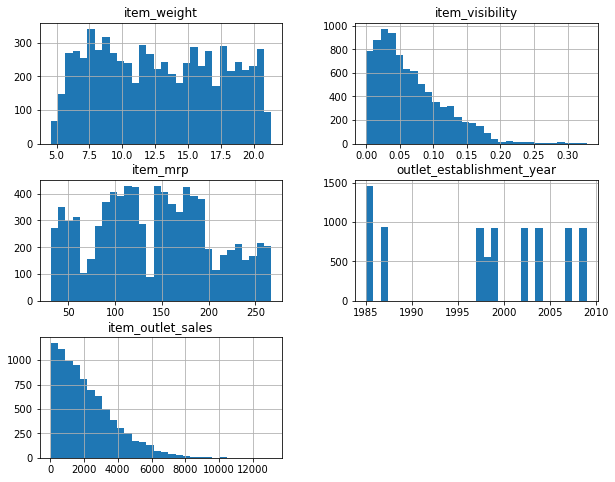

In [6]:
# plot the histogram to inspect variable distributions in numerical columns
data.hist(bins = 30, figsize = (10, 8))
plt.show()

From above, we can see that all the numerical columns do not follow a normal distribution.

# 2. Missing Value Imputation <a id = "part2"></a>

[Back to top](#top)

## 2.1 Checking For Missing Values <a id = "part2.1"></a>

[Back to top](#top)

After creating visualisations, we need to check for `null` values.

There are 2 reasons for removing `null` values
- They will affect visualisations
- Data transformations may not work

We can use `isnull()` to check for any `null` values.

`any()` is also used to show `True` and `False` values.

In [7]:
# Check to make sure that there are no missing values in our dataframe
data.isnull().any()

item_identifier              False
item_weight                   True
item_fat_content             False
item_visibility              False
item_type                    False
item_mrp                     False
outlet_identifier            False
outlet_establishment_year    False
outlet_size                   True
outlet_location_type         False
outlet_type                  False
item_outlet_sales            False
dtype: bool

From above, we can see that `item_weight` and `outlet_size` have null values as shown by `True`

Let's see how both columns look like

In [8]:
data['item_weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: item_weight, dtype: float64

In [9]:
print(data['item_weight'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: item_weight, Length: 8523, dtype: float64


In [10]:
data['outlet_size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: outlet_size, dtype: object

In [11]:
print(data['outlet_size'])

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: outlet_size, Length: 8523, dtype: object


## 2.2 Replacing Missing Values <a id = "part2.2"></a>

[Back to top](#top)

We can see that `item_weight` and `outlet_size` have different data types. 
- `item_weight` is a float
- `outlet_size` is an object (string) 

Hence different methods of replacing the `null` values are needed.

Let's try replacing the missing values in `item_weight` with the mean using Feature-engine.

In [12]:
# Let's create a median imputer
median_imputer = MeanMedianImputer(imputation_method = 'median', variables = ['item_weight'])

# Fit the imputer to the train set
median_imputer.fit(data)

# Transform column 'item_weight'
data = median_imputer.transform(data)

Let's try replacing the missing values in `outlet_size` with mode using Feature-engine.

In [13]:
# Let's create a frequent imputation transformer
mode_imputer = mdi.CategoricalImputer(imputation_method = 'frequent', variables = ['outlet_size'])

mode_imputer.fit(data)

# Transform column 'outlet_size'
data = mode_imputer.transform(data)

Let's check for any `null` values again using `data.isnull().any()` to make sure they were removed.

In [14]:
data.isnull().any()

item_identifier              False
item_weight                  False
item_fat_content             False
item_visibility              False
item_type                    False
item_mrp                     False
outlet_identifier            False
outlet_establishment_year    False
outlet_size                  False
outlet_location_type         False
outlet_type                  False
item_outlet_sales            False
dtype: bool

From above, we can see that the data is cleaned and we can now utilise the data.

# 3 Categorical Data Encoding <a id = "part3"></a>

[Back to top](#top)

## 3.1 Replace categories with ordinal numbers <a id = "part3.1"></a>

[Back to top](#top)

Encoding categorical columns is usually done to improve performance and predictions.

Some machine learning or decision tree models are not able to take in string values, so we encode them into integers to prevent this.

The code below is used to find the string columns.

In [15]:
# find string variables
cat_cols = [n for n in data.columns if data[n].dtypes == 'O']
cat_cols

['item_identifier',
 'item_fat_content',
 'item_type',
 'outlet_identifier',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

For this case, we will replace the categories with ordinal numbers using `feature_engine` to encode our categorical columns.

In [16]:
# Let's create the encoder
ordinal_enc = OrdinalEncoder(encoding_method = 'arbitrary', variables = cat_cols)

In [17]:
# Fit the encoder to the train set: it will learn the variables and categories to encode
ordinal_enc.fit(data)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['item_identifier', 'item_fat_content', 'item_type',
                          'outlet_identifier', 'outlet_size',
                          'outlet_location_type', 'outlet_type'])

In [18]:
# We can see which variables the encoder will encode
ordinal_enc.variables_

['item_identifier',
 'item_fat_content',
 'item_type',
 'outlet_identifier',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

After fitting the encoder, we will use it to transform the train and test data that we split earlier.

In [19]:
# Let's transform train and test set
data_enc = ordinal_enc.transform(data)

In [20]:
# Let's inspect the encoded train set
data_enc.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,0,9.30,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,1,5.92,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228
2,2,17.50,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,3,19.20,1,0.000000,3,182.0950,2,1998,0,1,2,732.3800
4,4,8.93,0,0.000000,4,53.8614,3,1987,1,1,0,994.7052


In [21]:
# Let's inspect the encoded test set
data_enc.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,0,9.30,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,1,5.92,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228
2,2,17.50,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,3,19.20,1,0.000000,3,182.0950,2,1998,0,1,2,732.3800
4,4,8.93,0,0.000000,4,53.8614,3,1987,1,1,0,994.7052


In [22]:
# We can see the encoding dictionary
ordinal_enc.encoder_dict_

{'item_identifier': {'FDA15': 0,
  'DRC01': 1,
  'FDN15': 2,
  'FDX07': 3,
  'NCD19': 4,
  'FDP36': 5,
  'FDO10': 6,
  'FDP10': 7,
  'FDH17': 8,
  'FDU28': 9,
  'FDY07': 10,
  'FDA03': 11,
  'FDX32': 12,
  'FDS46': 13,
  'FDF32': 14,
  'FDP49': 15,
  'NCB42': 16,
  'DRI11': 17,
  'FDU02': 18,
  'FDN22': 19,
  'FDW12': 20,
  'NCB30': 21,
  'FDC37': 22,
  'FDR28': 23,
  'NCD06': 24,
  'FDV10': 25,
  'DRJ59': 26,
  'FDE51': 27,
  'FDC14': 28,
  'FDV38': 29,
  'NCS17': 30,
  'FDP33': 31,
  'FDO23': 32,
  'DRH01': 33,
  'NCX29': 34,
  'FDV20': 35,
  'DRZ11': 36,
  'FDX10': 37,
  'FDB34': 38,
  'FDK43': 39,
  'FDA46': 40,
  'FDC02': 41,
  'FDL50': 42,
  'FDM39': 43,
  'NCP05': 44,
  'FDV49': 45,
  'FDL12': 46,
  'FDS02': 47,
  'NCL17': 48,
  'FDM40': 49,
  'FDR13': 50,
  'FDA43': 51,
  'NCP18': 52,
  'FDK21': 53,
  'NCX54': 54,
  'DRK35': 55,
  'FDY21': 56,
  'FDI26': 57,
  'FDM20': 58,
  'FDV27': 59,
  'FDF09': 60,
  'FDY40': 61,
  'FDY45': 62,
  'FDC46': 63,
  'FDH19': 64,
  'FDZ03': 65,
 

## 3.2 One Hot Encoding <a id = "part3.2"></a>

[Back to top](#top)

One reason why OHE is not used is because it makes new columns for each new variable.

For example, if `item_identifier` has 100 items, OHE will create 99 more columns.

This has two negative effects
- This severely impacts the processing speed
- Fitting transformations and showing visualisations take a long time

If we used one hot encoding to encode the categorical columns, this is what it will show

data_enc.head()

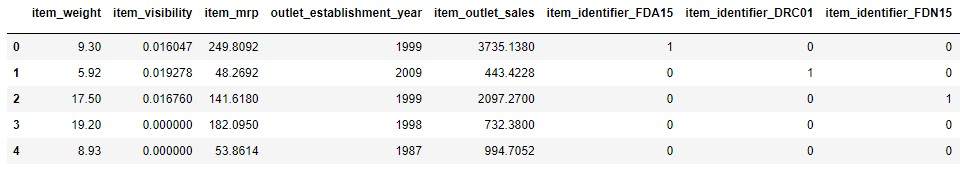

ohe_enc.encoder_dict_

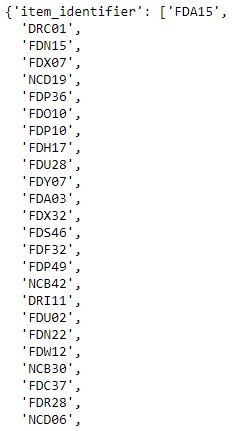

# 4 Data Preprocessing <a id = "part4"></a>

[Back to top](#top)

## 4.1 Before Transformation <a id = "part4.1"></a>

[Back to top](#top)

A method is created below to show the distributions for the different numerical columns.

The method will plot out 3 visualisations
- Histogram
- Q-Q plot
- Boxplot

In [23]:
def diagnostic_plots(df, variable):

    # define figure size
    plt.figure(figsize = (16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.title('Q-Q Plot')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

The code cell below is used to find the numerical columns.

In [24]:
# find numerical variables
num_cols = [n for n in data_enc.columns if data_enc[n].dtypes != 'O']
num_cols.remove('item_outlet_sales')
num_cols

['item_identifier',
 'item_weight',
 'item_fat_content',
 'item_visibility',
 'item_type',
 'item_mrp',
 'outlet_identifier',
 'outlet_establishment_year',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

Let's plot out the numerical coloumns.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


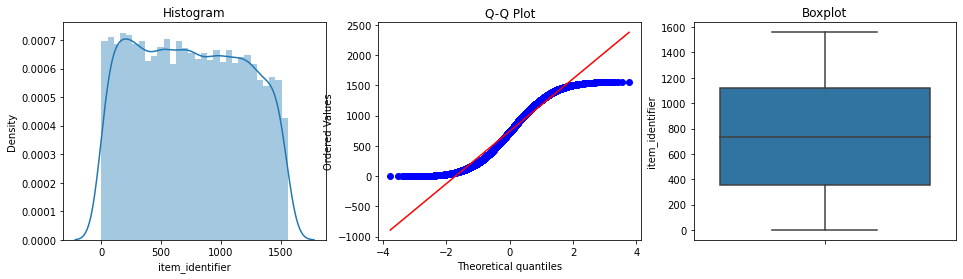

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


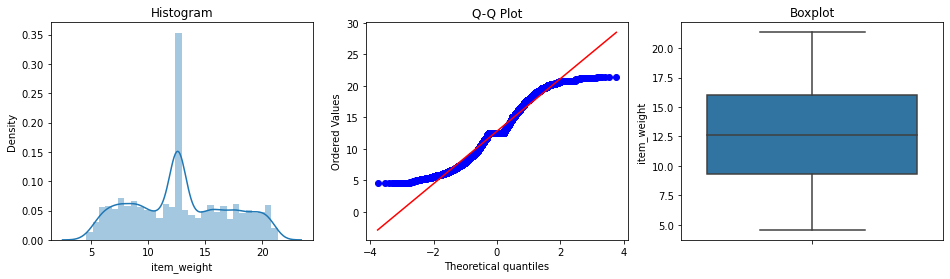

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


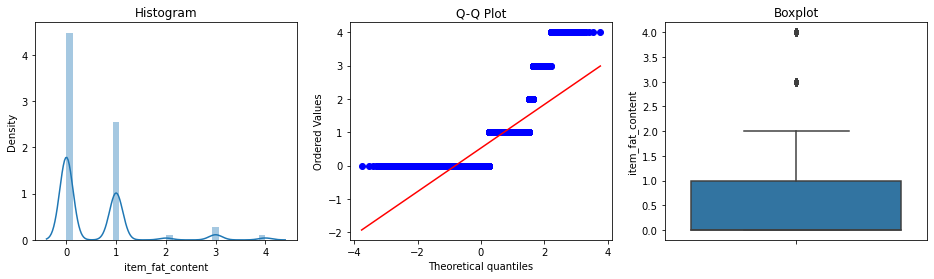

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


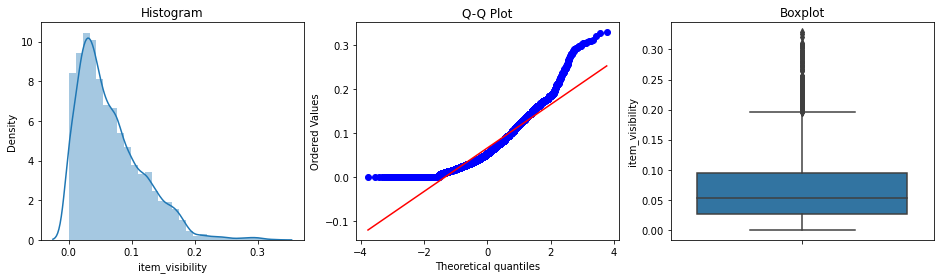

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


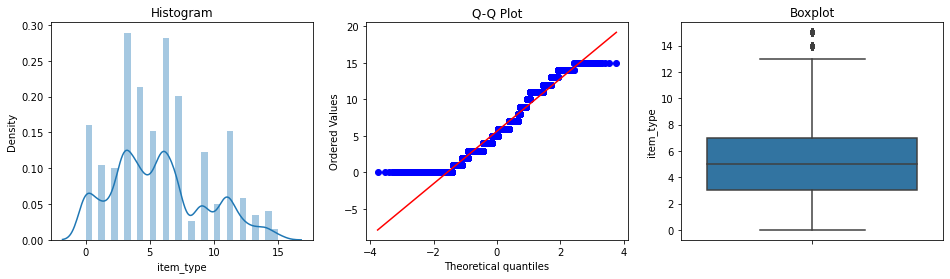

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


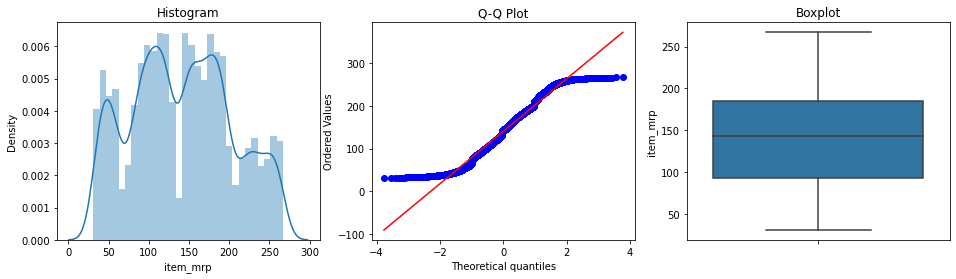

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


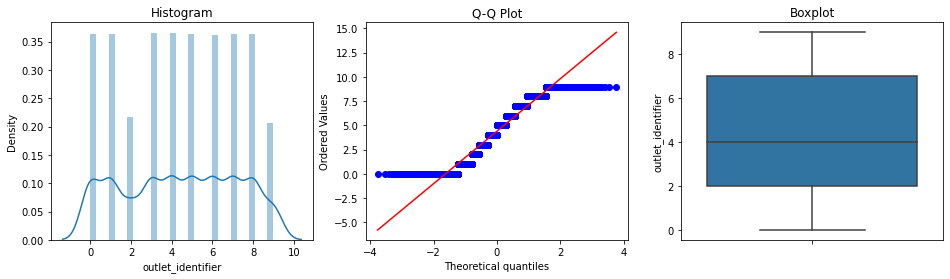

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


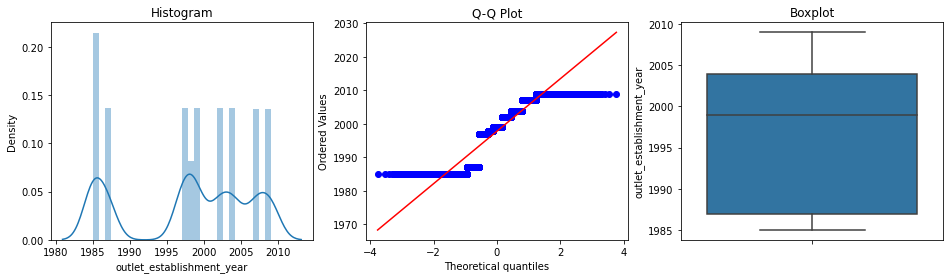

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


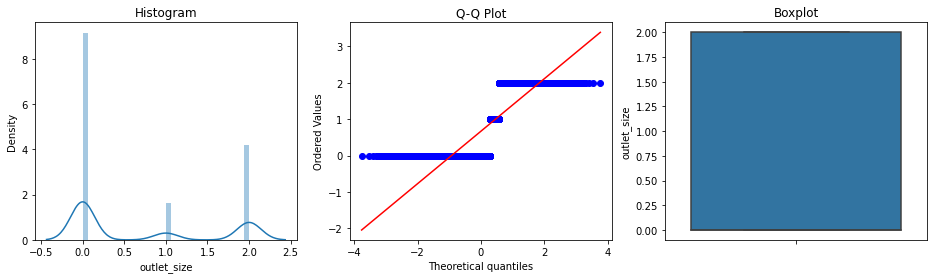

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


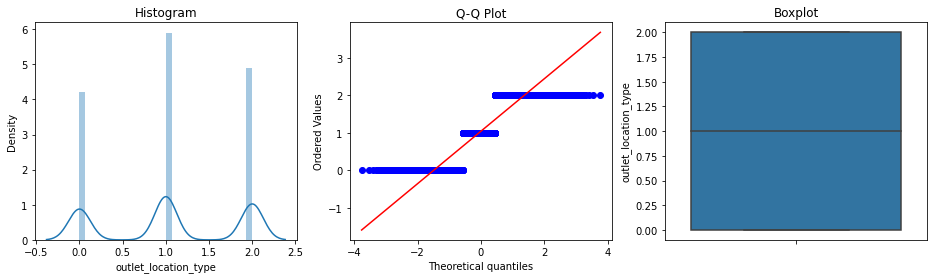

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


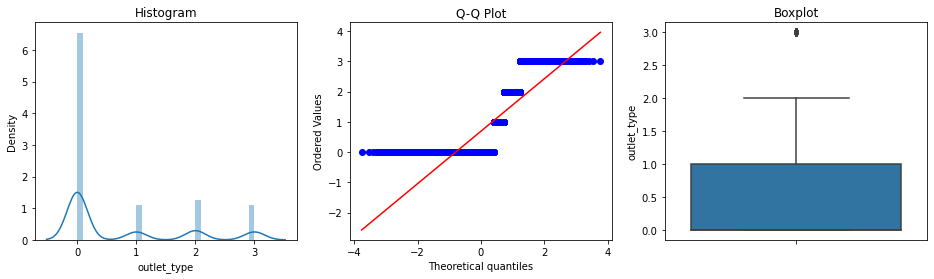

In [25]:
# plot histogram Q-Q, and box plots for all numerical variables to have a look at the variable distribution
for i in num_cols:
    diagnostic_plots(data_enc, i)

For `item_weight` (second set of visualisations), if we replaced the `null` values with the maximum value, we would see something like this

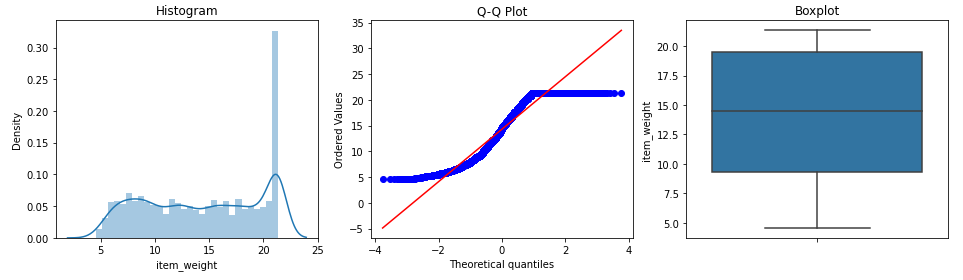

For item_weight (second set of visualisations), if we replaced the null values with the minimum value, we would see something like this

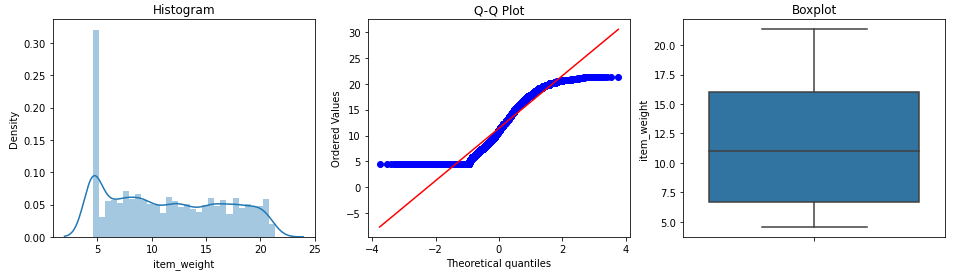

## 4.2 Transformation <a id = "part4.2"></a>

[Back to top](#top)

### 4.2.1 Transforming numerical values <a id = "part4.2.1"></a>

[Back to top](#top)

From the histograms, we can see that some are not normally distributed.

And from Q-Q plot, we can see that most do not follow the red line (which is another way of showing a normal distribution).

A normal distribution is important as it ensures that the data is not skewed or biased in any way which will help when making visualisations.

One way of achieving this is to transform the data.

`feature_engine` has many transformations (for example, Box Cox, Yeo Johnson, and exponential).

For this case, we will be using `YeoJohnsonTransformer`.

In [26]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = num_cols)

# fit transformer to the dataframe
yjt.fit(data_enc)

# transform indicated variables
data_tf = yjt.transform(data_enc)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


### 4.2.2 Removing Outliers <a id = "part4.2.2"></a>

[Back to top](#top)

In 5.1, we can see that `item_fat_content`, `item_visibility`, `item_type`, and `outlet_type` have outliers.

In experimenting with many transformations and which one to do first, it was discovered that removing outliers before a transformation had minimal effect on outliers. That is why a step to remove outliers is not needed. The data will be transformed using a transformer.

In theory, if the data is trimmed many times, all the outliers will be removed. But this can also remove too many rows which might affect the accuracy of the visualisations.

If we decided to remove outliers, this is what the visualisations made from the four aforementioned columns would look like.

`item_fat_content`

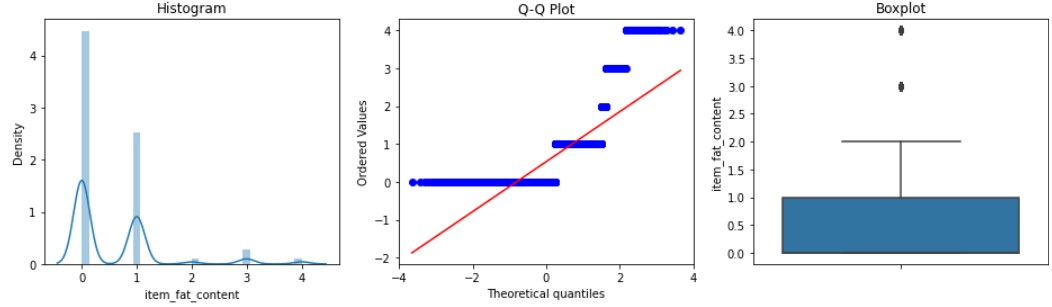

`item_visibility`

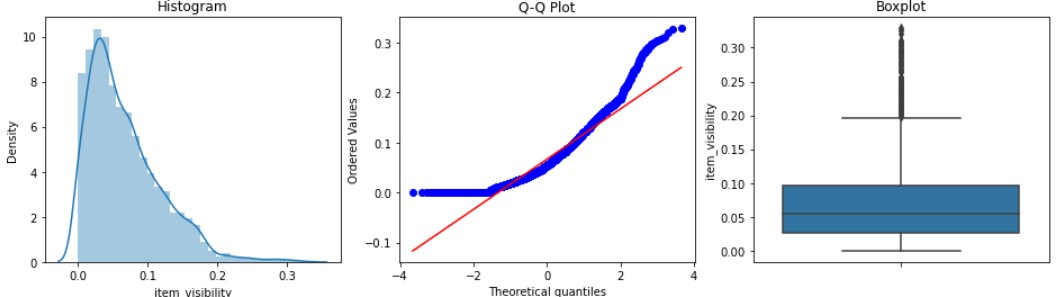

`item_type`

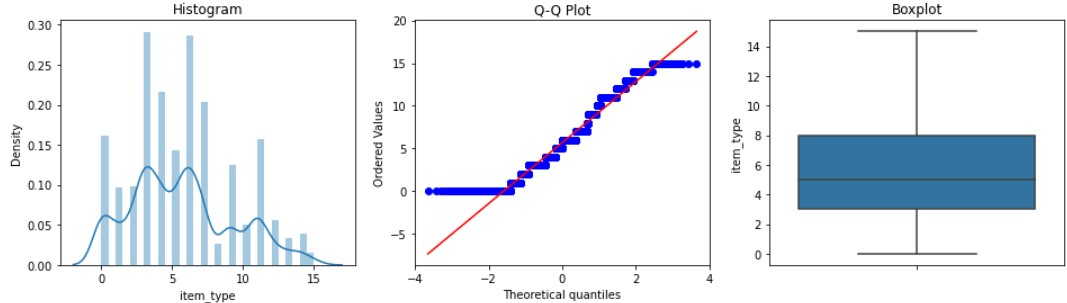

`outlet_type`

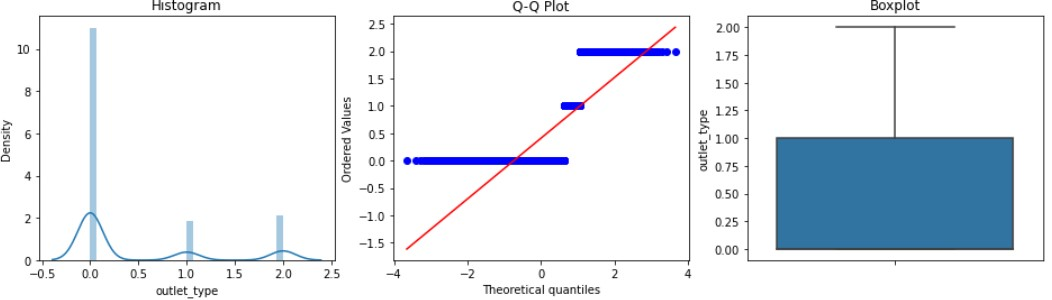

## 4.3 After Transformation <a id = "part4.3"></a>

[Back to top](#top)

### 4.3.1 Yeo-Johnson Transformation <a id = "part4.3.1"></a>

[Back to top](#top)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


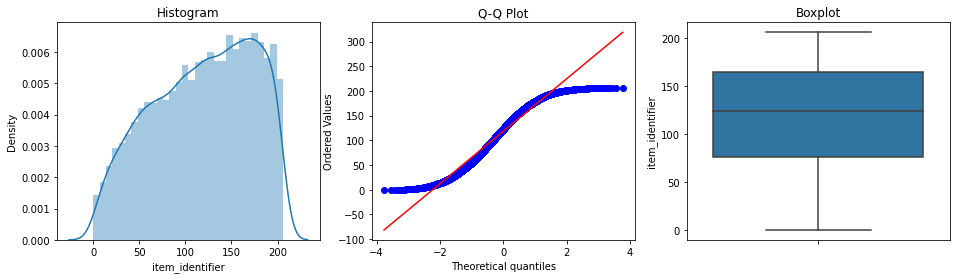

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


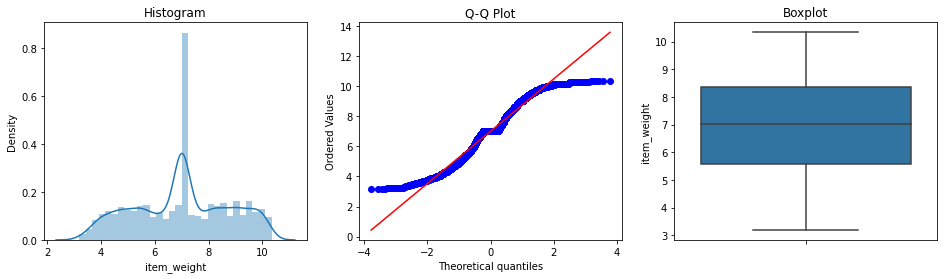

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


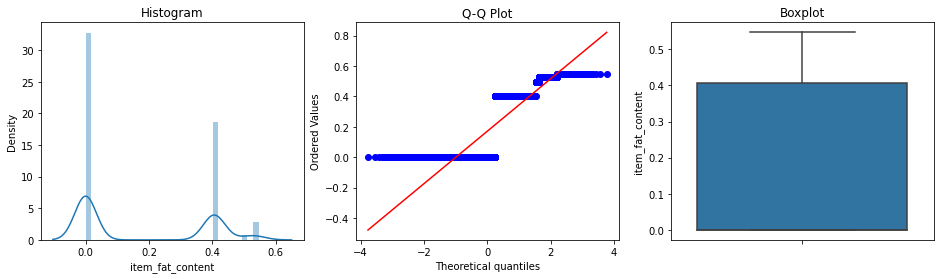

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


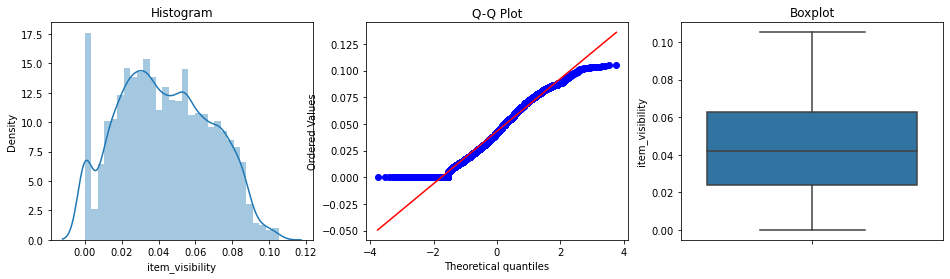

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


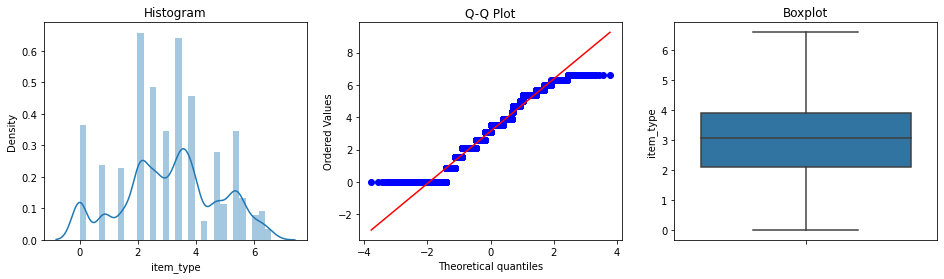

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


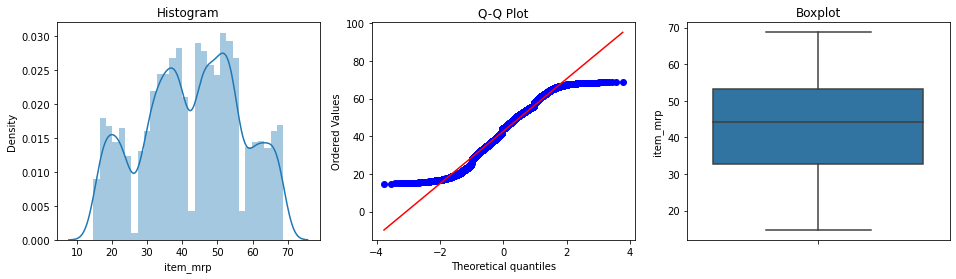

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


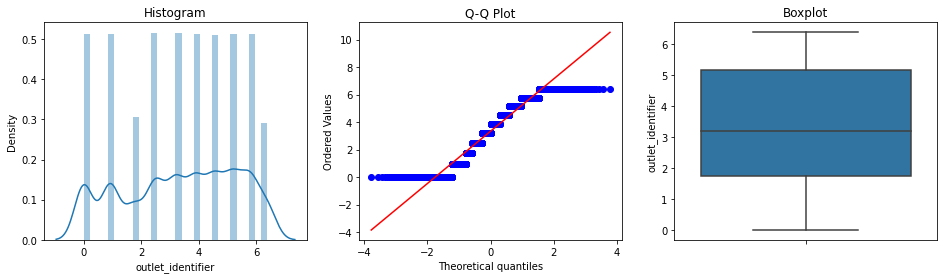

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


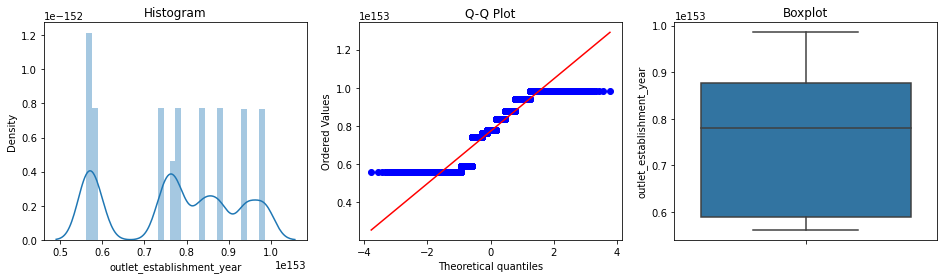

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


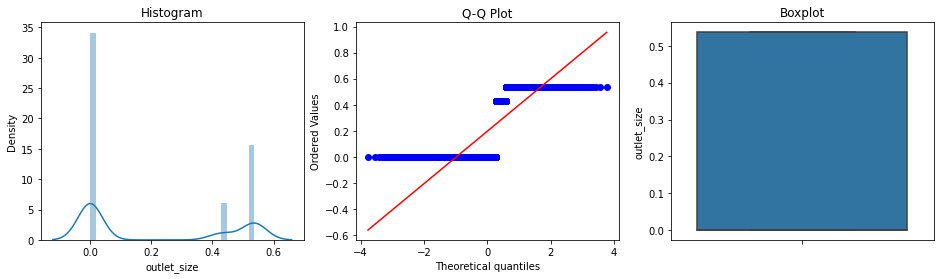

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


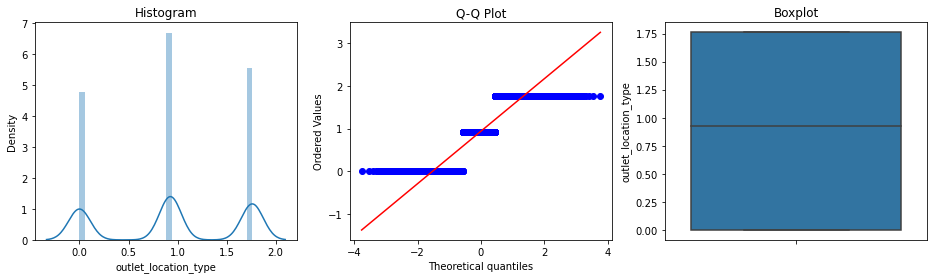

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


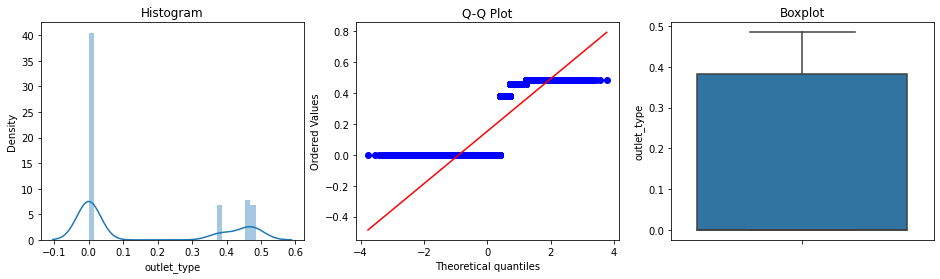

In [27]:
# make diagnostic plot of transformed variable
for i in num_cols:
    diagnostic_plots(data_tf, i)

For `item_weight` (second set of visualisations), if we replaced the null values with the maximum value, we would see something like this

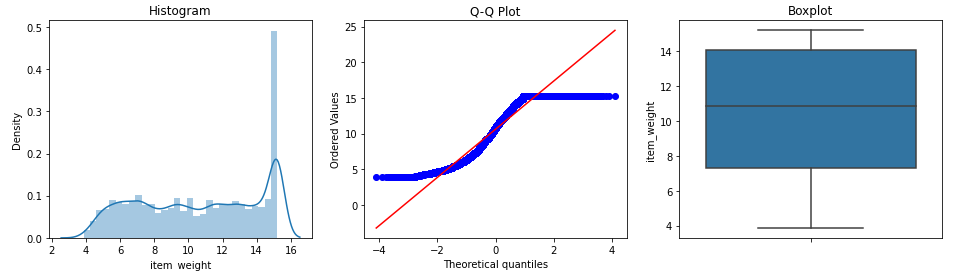

For `item_weight` (second set of visualisations), if we replaced the null values with the minimum value, we would see something like this

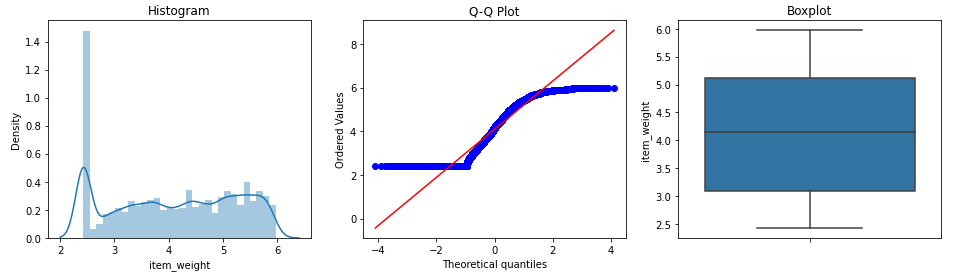

### 4.3.2 Square root Transformation <a id = "part4.3.2"></a>

[Back to top](#top)

If a square-root transformation was used instead, the visualisations would look like this.

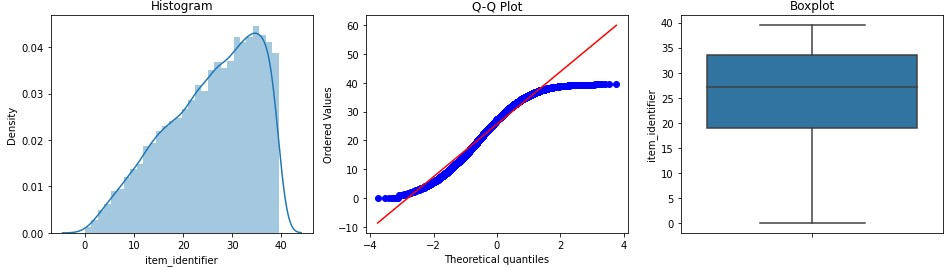

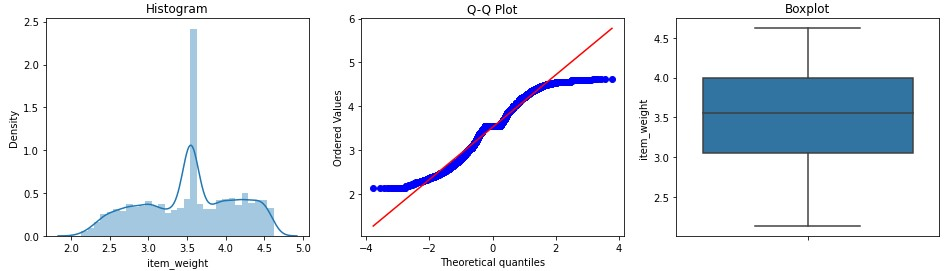

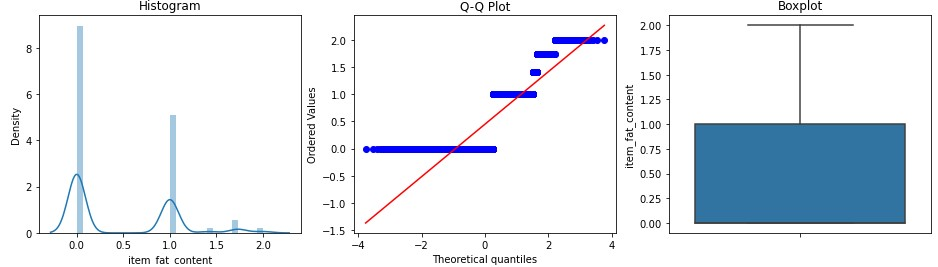

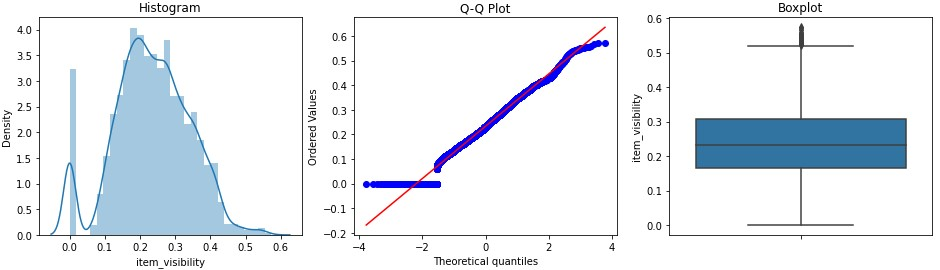

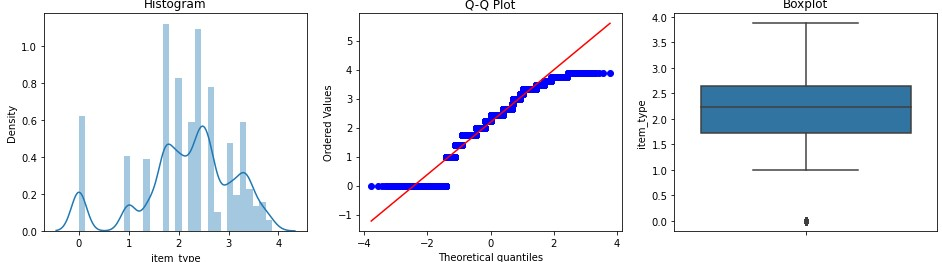

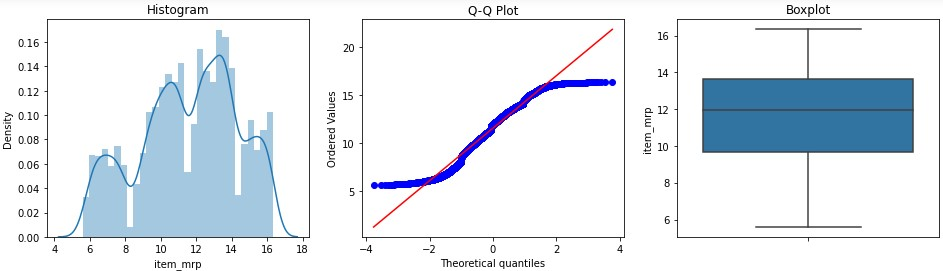

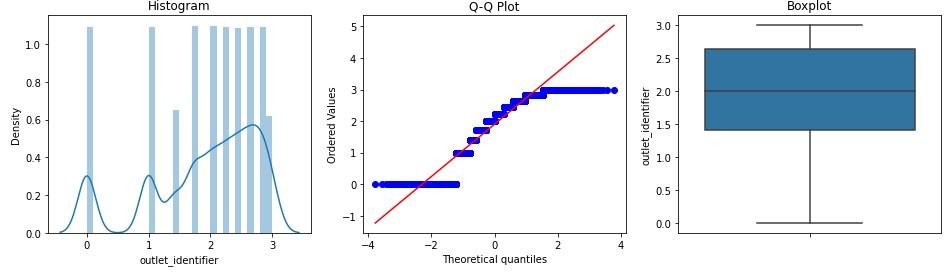

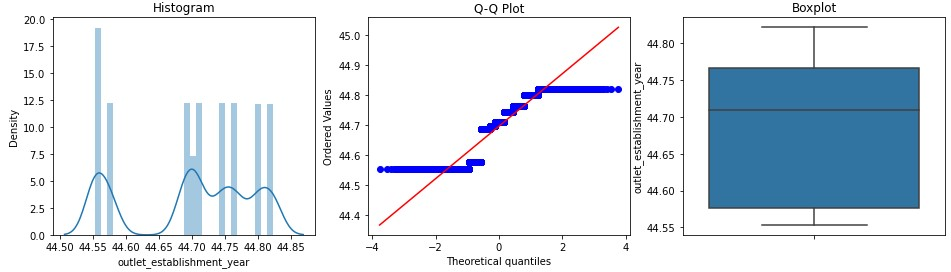

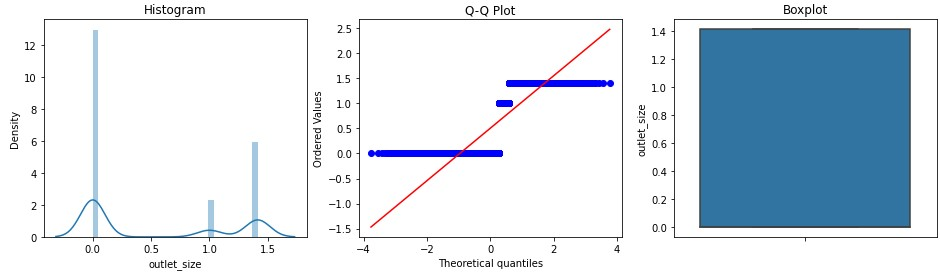

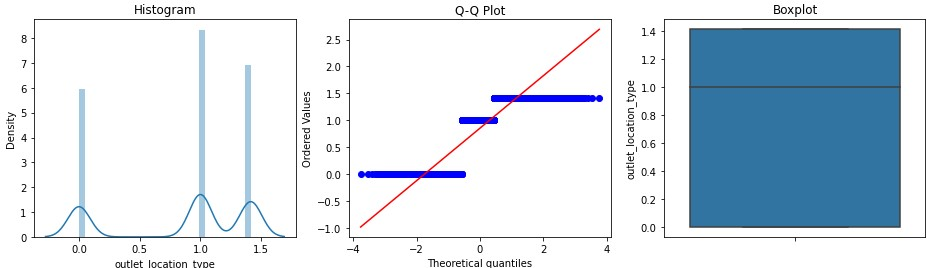

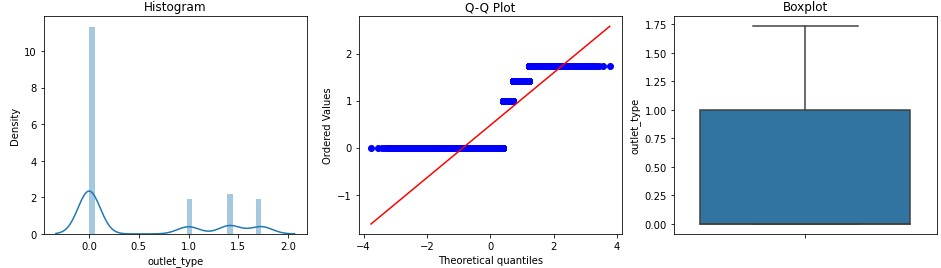

### 4.3.3 Cube root Transformation <a id = "part4.3.3"></a>

[Back to top](#top)

If a cube-root transformation was used instead, the visualisations would look like this.

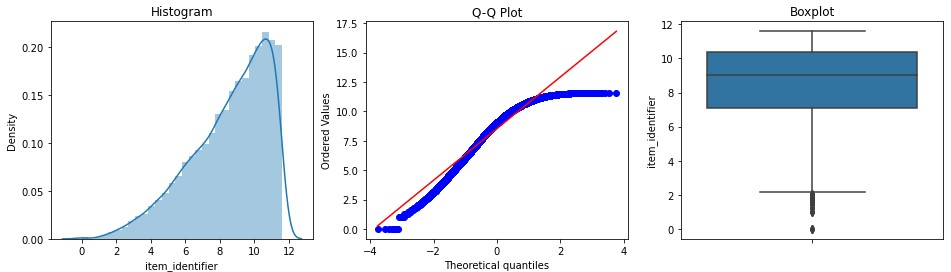

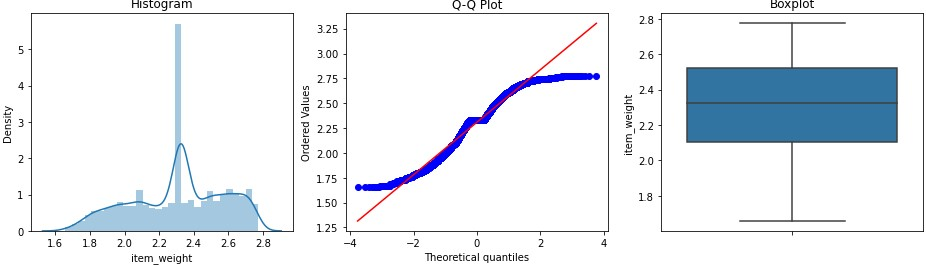

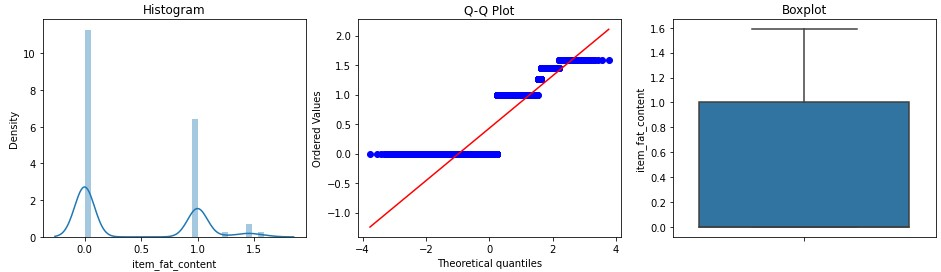

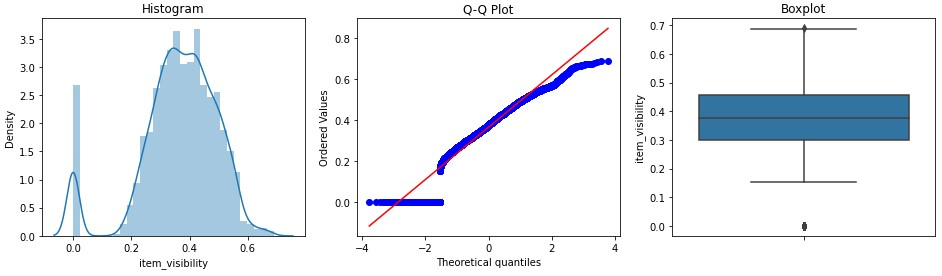

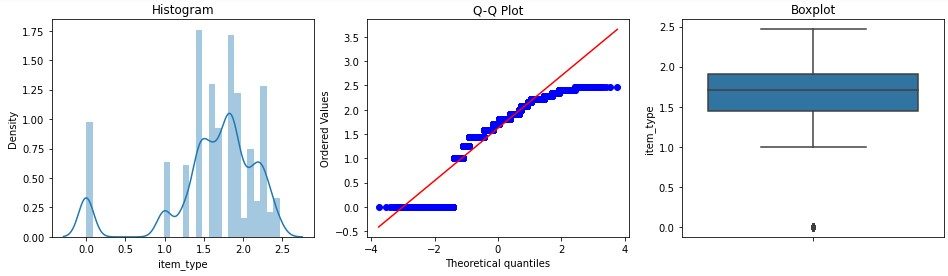

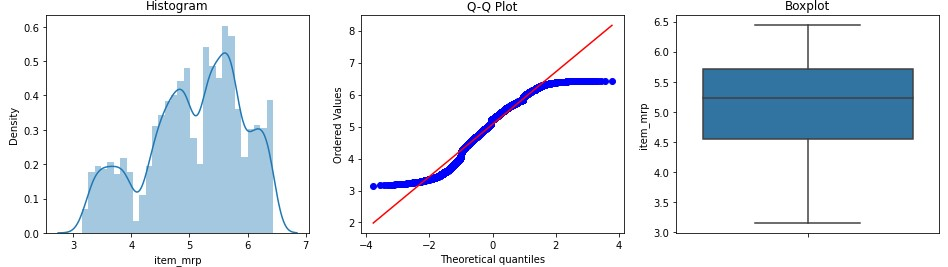

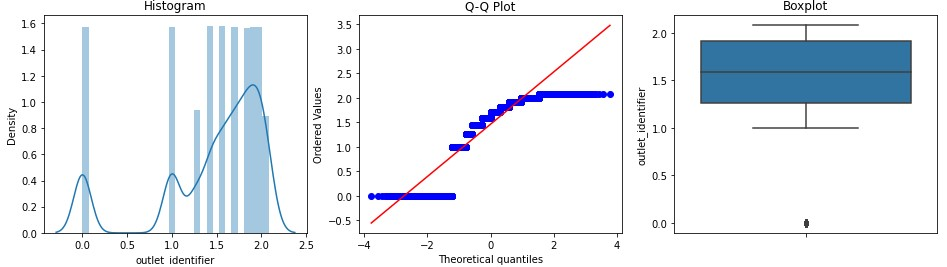

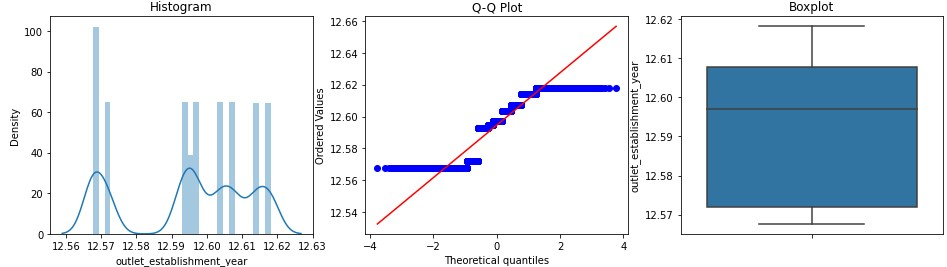

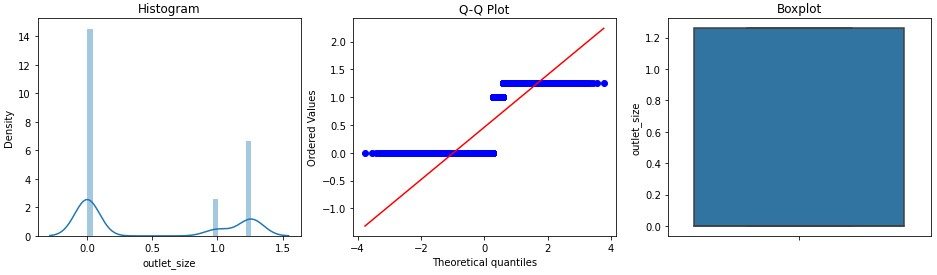

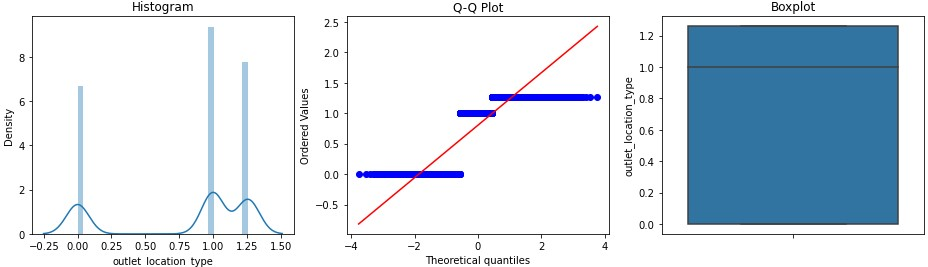

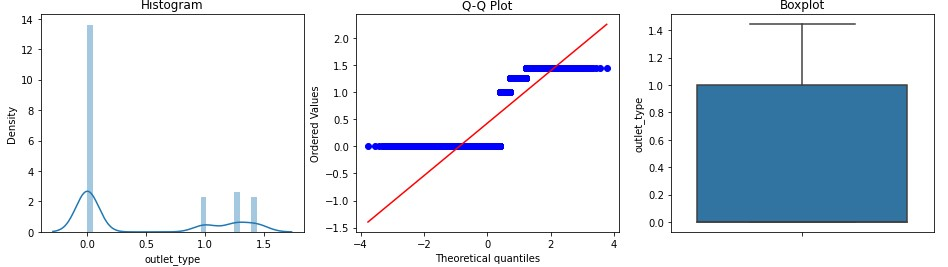

We can see the changes from all 3 transformations (Yeo-Johnson, Square root, Cube root). 

Each transformation removed outliers and made the distribution more normal.

# 5 Train and Test Split <a id = "part5"></a>

[Back to top](#top)

Let's separate the data into training and testing sets for our prediction model. This is done to prevent overfitting.

If our model is overfitted, it only memorises the training data. Hence, when new data is introduced, it will not performed well. 

For comparison, this is similar to you learning something from a book. But when the time comes for you to utilise the knowledge in real life, you will not know what to do.

To avoid overfitting, will will split our data into training set (70%) and testing set (30%).

Since `item_outlet_sales` is our target variable, we need to remove that column from the training set.

This is done so that we can compare our training set predictions (without `item_outlet_sales`) with the test set predictions (with `item_outlet_sales`).

In [28]:
# let's separate into training (70%) and testing (30%) set
X_train, X_test, y_train, y_test = train_test_split(
    data_enc.drop('item_outlet_sales', axis = 1), 
    data_enc, 
    test_size = 0.3, 
    random_state = 0)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

# 6. Variable Discretization / Binning <a id = "part6"></a>

[Back to top](#top)

Discretisation is the act of grouping data into groups or bins. 

Discretisation is also used to convert continuous data (1.01, 2.9999, 9.001, etc.) into discrete data (1-2, 2-3, 9-10,  etc.)

## 6.1 Using Equal Width Discretiser <a id = "part6.1"></a>

[Back to top](#top)

For this case, we will ceate an EWD using `feature_engine`.

In [29]:
# With feature engine we can automate the process for many variables in one line of code
disc = EqualWidthDiscretiser(bins = 10, variables = num_cols)
disc.fit(X_train)

EqualWidthDiscretiser(variables=['item_identifier', 'item_weight',
                                 'item_fat_content', 'item_visibility',
                                 'item_type', 'item_mrp', 'outlet_identifier',
                                 'outlet_establishment_year', 'outlet_size',
                                 'outlet_location_type', 'outlet_type'])

After creating the discretiser, we will transform the train and test sets.

In [30]:
# transform train and test sets
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

if the distributions in train and test set are similar, we should expect similar proportions of observations per interval for each numerical column.

Create a method that calculates and shows the proportion of observations per interval for each numerical column.

In [31]:
# Create a method to calculate and show the proportion of observations per interval
def ShowProportions(category, train_set, test_set):
    
    # calculate proportion of observations per interval
    t1 = train_set.groupby(category)[category].count() / len(train_set)
    t2 = test_set.groupby(category)[category].count() / len(test_set)

    # concatenate aggregated views
    tmp = pd.concat([t1, t2], axis = 1)
    tmp.columns = ['train', 'test']

    # plot
    tmp.plot.bar()
    plt.xticks(rotation = 0)
    plt.ylabel('Percentage of observations per bin')

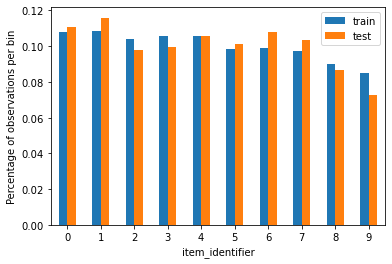

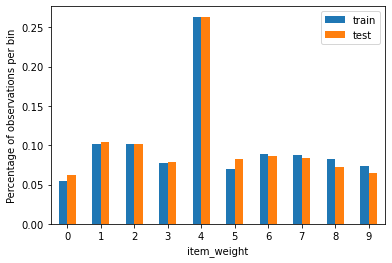

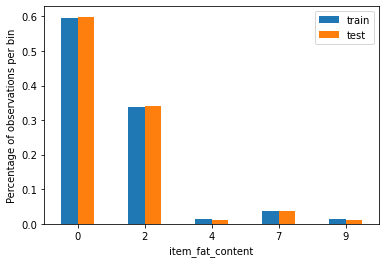

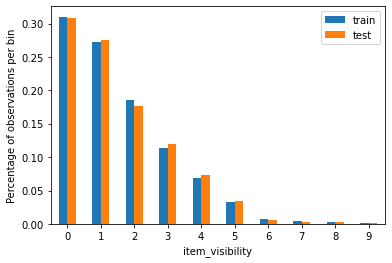

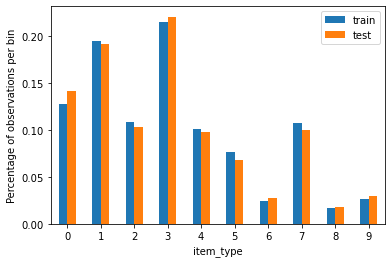

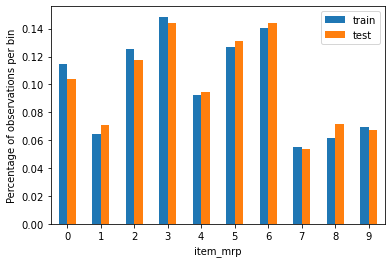

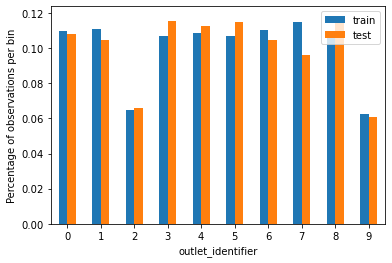

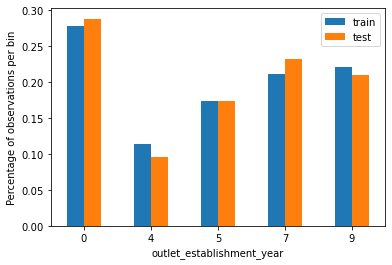

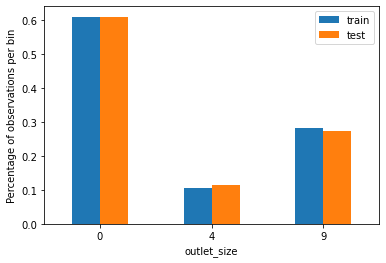

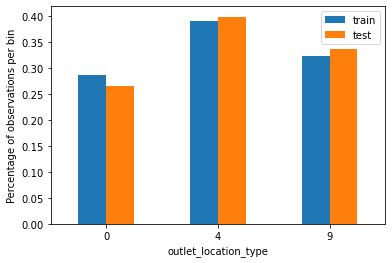

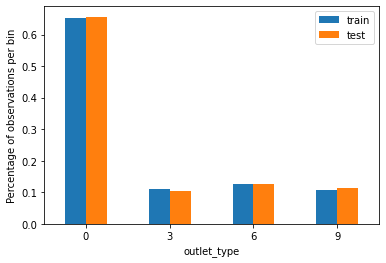

In [32]:
for i in num_cols:
    ShowProportions(i, train_t, test_t)

If we replaced the null values in `item_weight` with the maximum value, we would see something similar
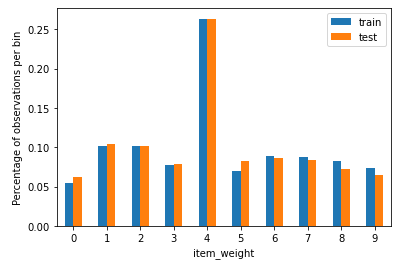

If we replaced the null values in `item_weight` with the minimum value, we would see something similar
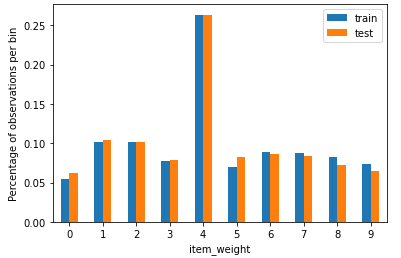

By replacing the `null` values with the max or min values, I expected the right or left bars to be higher than the median imputation. However, even though a different method was used to replace the `null` values, the spread still remained the same.

## 6.2 Using Equal Frequency Discretiser <a id = "part6.2"></a>

[Back to top](#top)

An alternative to the EWD is an EFD.

These are what our visualisations would look like if we used an EFD.

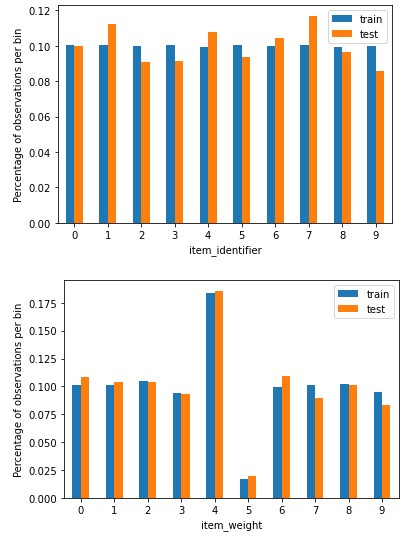

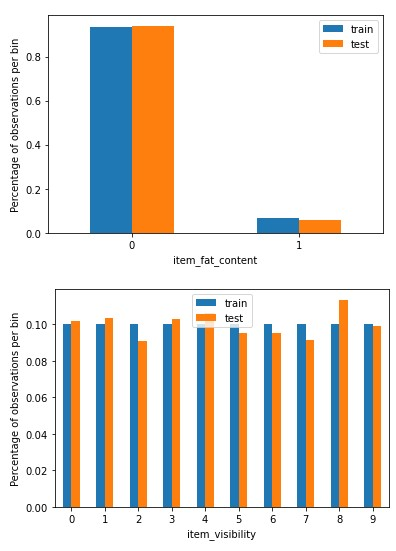

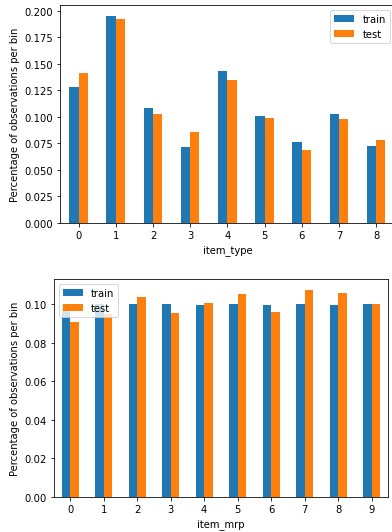

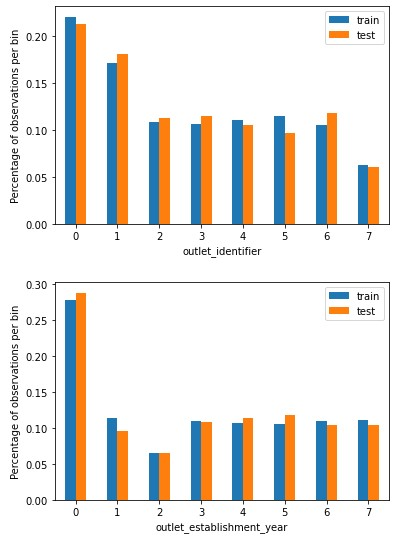

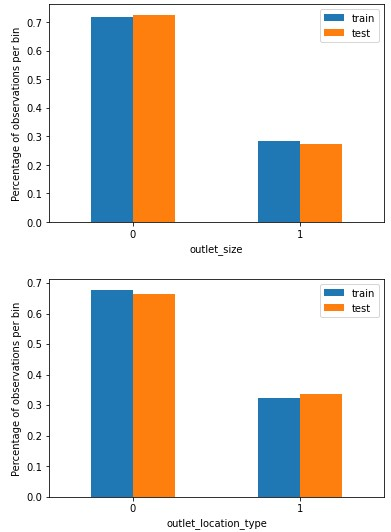

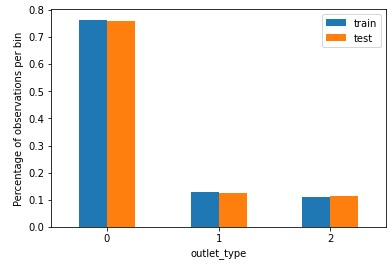

# 7. Feature Engineer <a id = "part7"></a>

[Back to top](#top)

## 7.1 Feature Scaling <a id = "part7.1"></a>

[Back to top](#top)

From looking at the data, we can see that all of the columns have different scales
- `item_weight` is in kg
- `item_visibility` is in %
- `item_mrp` is in $
- etc

Hence, we do scaling to make all the values follow the same scale. In this case, it would be the z-scale.

We can convert all values into their z-values. This is computed using (value - mean) / standard deviation.

For this case, we will use standardisation from `sklearn`.

### 7.1.1 Mean Normalisation <a id = "part7.1.1"></a>

[Back to top](#top)

In [33]:
# Calculate the mean
means = train_t.mean(axis = 0)

# Calculate the range
ranges = train_t.max(axis = 0) - train_t.min(axis = 0)

# Create X_train_scaled and X_test_scaled
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

Create a method that plots out the values before and after scaling.

In [34]:
def PlotScale(train_set, test_set, column_name, train_scaled, test_scaled):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
    
    for column in column_name:
        sns.kdeplot(train_set[column], ax = ax1, label = column)
        sns.kdeplot(X_train_scaled[column], ax=ax2, label = column)

    # before scaling
    ax1.set_title('Before Scaling')
    ax1.legend()

    # after scaling
    ax2.set_title('After Scaling')
    ax2.legend()
    
    plt.show()

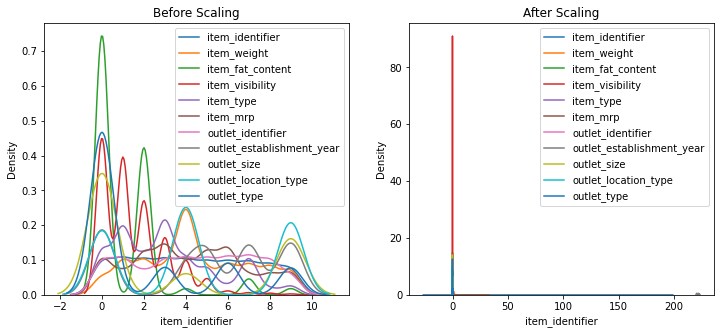

In [35]:
PlotScale(train_t, test_t, num_cols, X_train_scaled, X_test_scaled)

### 7.1.2 Standardisation <a id = "part7.1.2"></a>

[Back to top](#top)

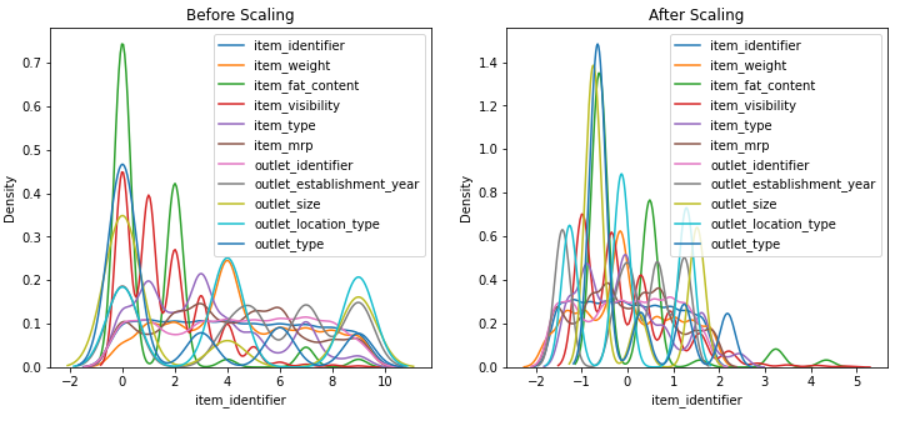

### 7.1.3 Min-Max Scaling <a id = "part7.1.3"></a>

[Back to top](#top)

If we used Min-Max Scaling, this is what the scaling will look like

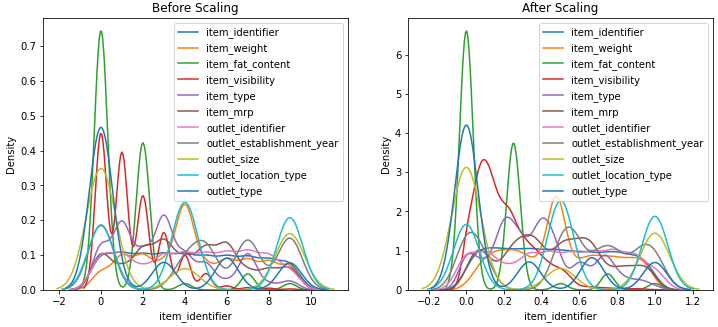

### 7.1.4 Maximum-Absolute Scaling <a id = "part7.1.4"></a>

[Back to top](#top)

If we used Maximum-Absolute Scaling, this is what the scaling will look like

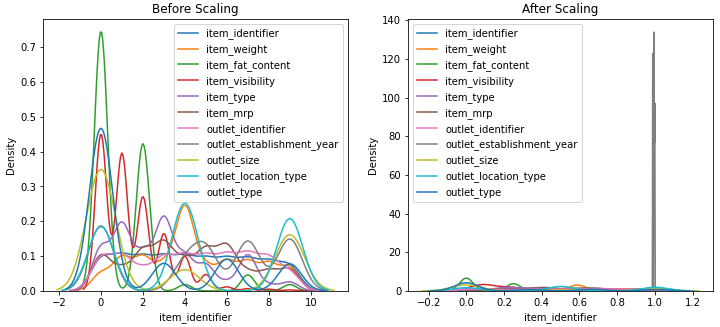

### 7.1.5 Robust Scaling <a id = "part7.1.5"></a>

[Back to top](#top)

If we used Robust Scaling, this is what the scaling will look like

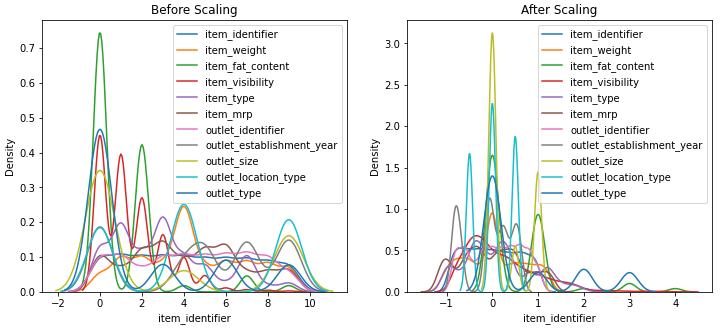

## 7.2 Principal Component Analysis <a id = "part7.2"></a>

[Back to top](#top)

PCA is a dimensionality reduction technique used to reduce a large dataset into a smaller subset of Principal Components (PC). 

Even though this improves performance, it can produce unwanted variability.

In [36]:
# set up the PCA
pca = PCA()

# train the PCA
pca.fit(X_train_scaled)

# create the principal components
X_train_final = pca.transform(X_train_scaled)
X_test_final = pca.transform(X_test_scaled)

In [37]:
# Show the number of PCs
print(len(pca.explained_variance_ratio_))

# Show the variance explanation for each PC
print(pca.explained_variance_ratio_)

11
[9.80155545e-01 1.92880229e-02 3.49205095e-04 8.95561106e-05
 6.60011988e-05 4.05018907e-05 4.66794066e-06 3.32896234e-06
 2.54277770e-06 6.15003106e-07 1.28976804e-08]


Text(0, 0.5, 'Percentage of Variance Explained')

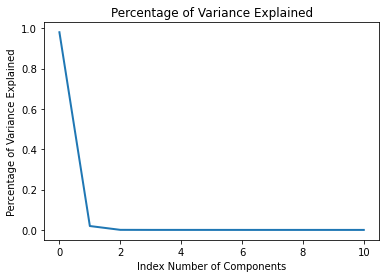

In [38]:
plt.plot(pca.explained_variance_ratio_, linewidth = 2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

The graph shows that the variance of the values decreases as the number of components increases.

# 8. Linear Regression Modelling <a id = "part8"></a>

[Back to top](#top)

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Root Mean Square Error (RMSE): The RMSE is the square root of the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of RMSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [39]:
X_train_final = X_train_scaled
X_test_final = X_test_scaled

y_train_final = y_train
y_test_final = y_test

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 148969.68064741892 
 test_mse: 162044.9771317533
train_r-sq: 0.9478039085521655 
 test_r-sq: 0.946784696265175


# 9. Summary <a id = "part9"></a>

[Back to top](#top)

## Part 3
- One Hot Encoding was not used as it severely impacted processsing speed
- Replacing cateogical columns with ordinal values was done before splitting the data because an error occured when building the regression model


## Part 4
- Only 3 transformations were shown because errors occured when trying other transformations (ie negative values, zero values) 
- Removing outliers was not needed as it had minimal impact


## Part 6
- All columns had similar distribution of values.


## Part 8
- Minimal changes were observed for MSE if we replaced the `null` values in `item_weight` with either the minimum or maximum values.

- Mean Normalisation was used because it gave the lowest MSE among all the scalers.


## Possible improvements
- Replace cateogical columns with ordinal values after splitting the data